# Wrangle and Analyze Data: WeRateDogs

## Introduction

The goal of this project is wrangling WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information, hence additional gathering, assessing and cleaning is required for worthy analyses and visualizations.

In [1]:
# Importing all required libraries

# General libraries

import pandas as pd
import numpy as np

import os

#To help reading html files
from bs4 import BeautifulSoup

#To donwload files programatically.
import requests

#To query the Twitter API and 
import tweepy
import json



## Gather

In [2]:
# Reading provided file from UDACITY
twitter_data = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# Downloading programmatically using the Requests library and the following URL: 

    #Requesting file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

    # Write tsv file   
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

    #Read data in tabular format
Imagenes_data = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
# Creating an API object to gather data from Twitter

consumer_key = '6qq2S76RYxQU9SHUxh4HA88ZF'
consumer_secret = 'Zt8IW3XUezRBMCkZVFScytQKzpvh56lDqk7l2lXrjjqsOHD0Ci'
access_token = '1034941704858730497-B6fs2Rg76YjgRocLffVukK0tix6Ig7'
access_secret = 'wBinKmdIJERV3FulmpqcQdfHyj2UeezfN7fWVw803Ppq7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret,)

api = tweepy.API(auth)

In [20]:
#Twitter Query using tweet_id information from the twitter_data.
tweet_errors=[]

#tweet_ids = list(twitter_data.tweet_id)
API_tweet_data = []

# Creating the API_tweet_data dataframe

for tweet in twitter_data.tweet_id:  
    try:
        tweet_status = api.get_status(tweet, tweet_mode='extended',  wait_on_rate_limit_notify = True, wait_on_rate_limit = True)._json
        API_tweet_data.append({'tweet_id':tweet,
                        'retweet_count':tweet_status['retweet_count'],
                        'favorite_count':tweet_status['favorite_count'],
                        'text':tweet_status['full_text'],
                        'retweeted': tweet_status['retweeted'],
                        'date_time':tweet_status['created_at']})

        
    except: 
        print("Found an error in tweet with ID: " + str(tweet))
        tweet_errors.append(tweet)

Found an error in tweet with ID: 888202515573088257
Found an error in tweet with ID: 873697596434513921
Found an error in tweet with ID: 869988702071779329
Found an error in tweet with ID: 866816280283807744
Found an error in tweet with ID: 861769973181624320
Found an error in tweet with ID: 845459076796616705
Found an error in tweet with ID: 842892208864923648
Found an error in tweet with ID: 837012587749474308
Found an error in tweet with ID: 827228250799742977
Found an error in tweet with ID: 802247111496568832
Found an error in tweet with ID: 775096608509886464
Found an error in tweet with ID: 771004394259247104
Found an error in tweet with ID: 770743923962707968


Rate limit reached. Sleeping for: 544


Found an error in tweet with ID: 758740312047005698
Found an error in tweet with ID: 754011816964026368


Rate limit reached. Sleeping for: 561


Found an error in tweet with ID: 676957860086095872


In [22]:
tweet_errors

[892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193,
 892420643555336193]

In [5]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(API_tweet_data, columns = ['tweet_id','retweet_count', 'favorite_count',
                                               'text','retweeted', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

NameError: name 'API_tweet_data' is not defined

In [6]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [25]:
tweet_data

,tweet_id,retweet_count,favorite_count,text,retweeted,date_time
0,892420643555336193,8459,38443,This is Phineas. He's a mystical boy. Only eve...,False,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6229,32948,This is Tilly. She's just checking pup on you....,False,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4129,24818,This is Archie. He is a rare Norwegian Pouncin...,False,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8586,41801,This is Darla. She commenced a snooze mid meal...,False,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9316,39970,This is Franklin. He would like you to stop ca...,False,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3087,20061,Here we have a majestic great white breaching ...,False,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2053,11740,Meet Jax. He enjoys ice cream so much he gets ...,False,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,18770,64921,When you watch your owner call another dog a g...,False,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4237,27576,This is Zoey. She doesn't want to be one of th...,False,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7349,31646,This is Cassie. She is a college pup. Studying...,False,Wed Jul 26 15:59:51 +0000 2017


## Assessing 

The following lines are intended to assess and overview the information from the obtained data sets. 
At the end of the section it can be found a summary of some of the issued encountered

In [7]:
# Getting basic general info from the three data sets. 
# Assessing WeRateDogs Twitter archive
twitter_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


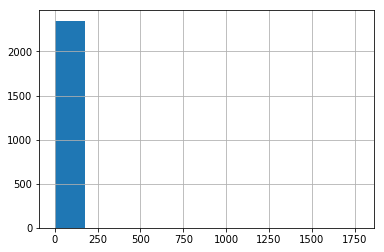

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline
twitter_data.rating_numerator.hist()


In [23]:
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [33]:
twitter_data[twitter_data.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
twitter_data[twitter_data.expanded_urls.duplicated()].size

2329

In [29]:
# Getting basic general info from the three data sets. 
# Assessing  tweet image predictions archive
Imagenes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
Imagenes_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
Imagenes_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
# Getting basic general info from the three data sets. 
# Assessing archive get with Tweepy library and saved as tweet_json.txt
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
text              2340 non-null object
retweeted         2340 non-null bool
date_time         2340 non-null object
dtypes: bool(1), int64(3), object(2)
memory usage: 93.8+ KB


In [33]:
tweet_data

,tweet_id,retweet_count,favorite_count,text,retweeted,date_time
0,892420643555336193,8459,38443,This is Phineas. He's a mystical boy. Only eve...,False,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6229,32948,This is Tilly. She's just checking pup on you....,False,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4129,24818,This is Archie. He is a rare Norwegian Pouncin...,False,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8586,41801,This is Darla. She commenced a snooze mid meal...,False,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9316,39970,This is Franklin. He would like you to stop ca...,False,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3087,20061,Here we have a majestic great white breaching ...,False,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2053,11740,Meet Jax. He enjoys ice cream so much he gets ...,False,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,18770,64921,When you watch your owner call another dog a g...,False,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4237,27576,This is Zoey. She doesn't want to be one of th...,False,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7349,31646,This is Cassie. She is a college pup. Studying...,False,Wed Jul 26 15:59:51 +0000 2017


In [ ]:
#### Quality
##### `Twitter archive enhance` table

- Timestamp and Retweeted_status_timestamp, should be a datetime objects
- The in_reply_to_status_id and in_reply_to_user_id are flot data type, instead of intengers
- There are 2297 instead of 2356 values for the expanded_urls
- Several unclear rating_numerator values
- Some unclear rating_denominator values


##### `image-predictions` table

                                                                  
                                                                  
                                                                  
                                                                  
                                                                  
                                                                  - Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

##### `adverse_reactions` table
- Lowercase given names and surnames